# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [64]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [65]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [66]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [67]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [68]:
from sklearn.model_selection import train_test_split

X = data.drop('MEDV', axis=1)
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [69]:
from sklearn.linear_model import LinearRegression
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Generate predictions on the training set
y_train_pred = model.predict(X_train)

# Generate predictions on the testing set
y_test_pred = model.predict(X_test)




## 3. Calculate and print R-squared for both the training and the testing set.

In [91]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Training set R² score:", r2_train)
print("Testing set R² score:", r2_test)

Training set R² score: 0.7508856358979673
Testing set R² score: 0.6687594935356317


## 4. Calculate and print mean squared error for both the training and the testing set.

In [92]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Training set MSE:", mse_train)
print("Testing set MSE:", mse_test)

Training set MSE: 21.641412753226312
Testing set MSE: 24.291119474973538


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [93]:
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print("Training set Mae:", mae_train)
print("Testing set MAE:", mae_test)

Training set Mae: 3.3147716267832252
Testing set MAE: 3.1890919658878416


## Classification Model Evaluation

In [73]:
from sklearn.datasets import load_iris
data = load_iris()

In [74]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
column_names = data.feature_names


In [76]:
df = pd.DataFrame(data['data'],columns=column_names)

In [94]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
target = pd.DataFrame(data.target)


In [79]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [80]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [102]:
X = df
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [105]:
from sklearn.linear_model import LogisticRegression
# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=200)

# Train the model on the training data
model.fit(X_train, y_train)

# Generate predictions on the training set
y_train_pred = model.predict(X_train)

# Generate predictions on the testing set
y_test_pred = model.predict(X_test)



## 8. Calculate and print the accuracy score for both the training and the testing set.

In [119]:
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score, precision_score, recall_score, f1_score , classification_report, confusion_matrix

# Evaluate the model on the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
classification_report_train = classification_report(y_train, y_train_pred)

# Evaluate the model on the testing set
accuracy_test = accuracy_score(y_test, y_test_pred)
classification_report_test = classification_report(y_test, y_test_pred)

# Print the results
print("Training set accuracy:", accuracy_train)
print("Training set classification report:\n", classification_report_train)

print("Testing set accuracy:", accuracy_test)
print("Testing set classification report:\n", classification_report_test)


Training set accuracy: 0.975
Training set classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.93      0.96        41
           2       0.93      1.00      0.96        39

    accuracy                           0.97       120
   macro avg       0.98      0.98      0.97       120
weighted avg       0.98      0.97      0.97       120

Testing set accuracy: 1.0
Testing set classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [109]:

# Calculate and print the balanced accuracy score for the training set
balanced_accuracy_train = balanced_accuracy_score(y_train, y_train_pred)
print("Training set balanced accuracy:", balanced_accuracy_train)

# Calculate and print the balanced accuracy score for the testing set
balanced_accuracy_test = balanced_accuracy_score(y_test, y_test_pred)
print("Testing set balanced accuracy:", balanced_accuracy_test)




Training set balanced accuracy: 0.975609756097561
Testing set balanced accuracy: 1.0


## 10. Calculate and print the precision score for both the training and the testing set.

In [110]:
precision_train = precision_score(y_train, y_train_pred, average='weighted')
print("Training set precision score:", precision_train)

precision_test = precision_score(y_test, y_test_pred, average='weighted')
print("Training set precision score:", precision_test)


Training set precision score: 0.9767857142857144
Training set precision score: 1.0


## 11. Calculate and print the recall score for both the training and the testing set.

In [112]:

# Calculate and print the recall score for the training set
recall_train = recall_score(y_train, y_train_pred, average='weighted')
print("Training set recall score:", recall_train)

# Calculate and print the recall score for the testing set
recall_test = recall_score(y_test, y_test_pred, average='weighted')
print("Testing set recall score:", recall_test)


Training set recall score: 0.975
Testing set recall score: 1.0


## 12. Calculate and print the F1 score for both the training and the testing set.

In [115]:

# Calculate and print the F1 score for the training set
f1_train = f1_score(y_train, y_train_pred, average='weighted')
print("Training set F1 score:", f1_train)

# Calculate and print the F1 score for the testing set
f1_test = f1_score(y_test, y_test_pred, average='weighted')
print("Testing set F1 score:", f1_test)


Training set F1 score: 0.9749882794186592
Testing set F1 score: 1.0


## 13. Generate confusion matrices for both the training and the testing set.

Training set confusion matrix:
 [[40  0  0]
 [ 0 38  3]
 [ 0  0 39]]
Testing set confusion matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


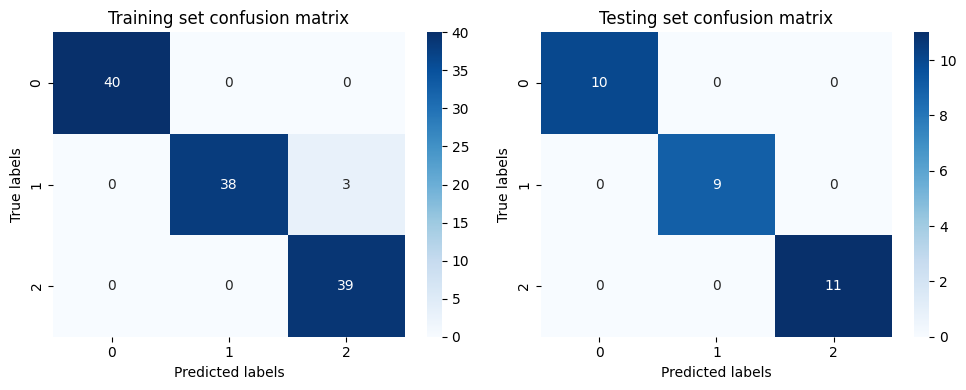

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate and print the confusion matrix for the training set
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Training set confusion matrix:\n", confusion_matrix_train)

# Calculate and print the confusion matrix for the testing set
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Testing set confusion matrix:\n", confusion_matrix_test)


# Plot confusion matrix for the training set
plt.figure(figsize=(10, 4))

# Training set confusion matrix
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix_train, annot=True, cmap='Blues', fmt='g')
plt.title('Training set confusion matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Testing set confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix_test, annot=True, cmap='Blues', fmt='g')
plt.title('Testing set confusion matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Adjust layout
plt.tight_layout()
plt.show()


## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

Random Forest Classifier
Training set accuracy: 1.0
Training set balanced accuracy: 1.0
Training set precision score: 1.0
Training set recall score: 1.0
Training set F1 score: 1.0
Testing set accuracy: 1.0
Testing set balanced accuracy: 1.0
Testing set precision score: 1.0
Testing set recall score: 1.0
Testing set F1 score: 1.0
Training set confusion matrix:
 [[40  0  0]
 [ 0 41  0]
 [ 0  0 39]]
Testing set confusion matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


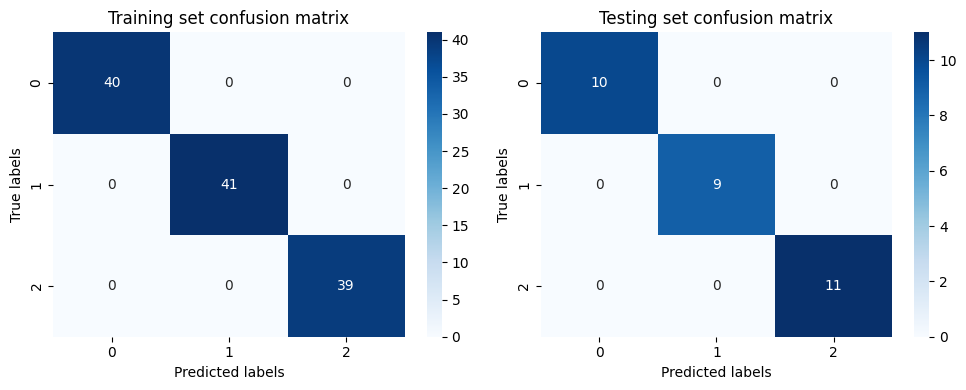

In [ ]:
from sklearn.ensemble import RandomForestClassifier



rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

rf_model.fit(X_train, y_train)


y_train_pred_rf = rf_model.predict(X_train)


y_test_pred_rf = rf_model.predict(X_test)


accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
balanced_accuracy_train_rf = balanced_accuracy_score(y_train, y_train_pred_rf)
precision_train_rf = precision_score(y_train, y_train_pred_rf, average='weighted')
recall_train_rf = recall_score(y_train, y_train_pred_rf, average='weighted')
f1_train_rf = f1_score(y_train, y_train_pred_rf, average='weighted')


accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
balanced_accuracy_test_rf = balanced_accuracy_score(y_test, y_test_pred_rf)
precision_test_rf = precision_score(y_test, y_test_pred_rf, average='weighted')
recall_test_rf = recall_score(y_test, y_test_pred_rf, average='weighted')
f1_test_rf = f1_score(y_test, y_test_pred_rf, average='weighted')

# Print the results
print("Random Forest Classifier")
print("Training set accuracy:", accuracy_train_rf)
print("Training set balanced accuracy:", balanced_accuracy_train_rf)
print("Training set precision score:", precision_train_rf)
print("Training set recall score:", recall_train_rf)
print("Training set F1 score:", f1_train_rf)

print("Testing set accuracy:", accuracy_test_rf)
print("Testing set balanced accuracy:", balanced_accuracy_test_rf)
print("Testing set precision score:", precision_test_rf)
print("Testing set recall score:", recall_test_rf)
print("Testing set F1 score:", f1_test_rf)

conf_matrix_train_rf = confusion_matrix(y_train, y_train_pred_rf)
print("Training set confusion matrix:\n", conf_matrix_train_rf)

conf_matrix_test_rf = confusion_matrix(y_test, y_test_pred_rf)
print("Testing set confusion matrix:\n", conf_matrix_test_rf)

plt.figure(figsize=(10, 4))


plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train_rf, annot=True, cmap='Blues', fmt='g')
plt.title('Training set confusion matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')


plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test_rf, annot=True, cmap='Blues', fmt='g')
plt.title('Testing set confusion matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')


plt.tight_layout()
plt.show()
